# some important links
<br>
healpy package: https://healpy.readthedocs.io/en/latest/
<br>
namaster package: https://namaster.readthedocs.io/en/latest/index.html
<br>
DES-Y3 shear catalog paper: https://arxiv.org/abs/2011.03408
<br>
ACT-DR4 CMB weak lensing paper: https://arxiv.org/abs/2004.01139
<br>
If you need the data files used here, please send an email to me shabbir.137@gmail.com . I will share the link to download the files
<br>
Please let me know in case you have any questions or spot any mistakes by email

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymaster as nmt
import healpy as hp

In [2]:
import math

In [3]:
data_path = './data/'

# Generate mock data

1) CMB convergence $\kappa$ map; spin-0 field
<br>
2) galaxies shear $(\gamma_1, \gamma_2)$ map; spin-2 field (two components) 

$C^{\kappa \kappa}_{\ell}$ for CMB

In [4]:
#theory power spectrum of CMB convergence (kappa_C)
Cl11 = np.loadtxt(data_path + 'CCL_thCl-f1z1f1z1.dat')

$C^{\kappa \kappa}_{\ell}$ for galaxies

In [5]:
#theory power spectrum of galaxies convergence (kappa_g) [DES-Y3 source bin-4]
Cl22 = np.loadtxt(data_path + 'CCL_thCl-f8z5f8z5.dat')

cross-correlation of CMB $\kappa$ and galaxies $\kappa$

In [6]:
#cross power spectrum of kappa_C and kappa_g
Cl12 = np.loadtxt(data_path + 'CCL_thCl-f1z1f8z5.dat')

galaxies $\kappa$ and $(\gamma_1, \gamma_2)$ are related

# generate correlated gaussian fields

In [7]:
#map resolution
nside = 1024
elmax = 2*nside
el = np.arange(0, elmax + 1, 1)

In [8]:
hp.nside2resol(nside=nside, arcmin=True)

3.435486411817406

In [9]:
#multiply Cl22 by ell pre-factor (neglected here) for more accurate model for shear power spectrum

$\gamma^{\rm E}_{lm} = - \sqrt{\frac{(l-1)(l+2)}{l(l+1)}} \kappa_{lm}$

In [10]:
ClTT = np.ndarray(shape = (elmax + 1))
ClTE = np.ndarray(shape = (elmax + 1))
ClEE = np.ndarray(shape = (elmax + 1))
ClBB = np.ndarray(shape = (elmax + 1))

In [11]:
ClTT = Cl11[:elmax+1, 1]
ClTE = Cl12[:elmax+1, 1]
ClEE = Cl22[:elmax+1, 1]
ClBB = np.zeros(elmax+1)

# generate correlated CMB kappa and galaxies shear signal map

In [12]:
#generating gaussian fields
maps_1 = hp.synfast(cls = [ClTT, ClTE, ClEE, ClBB], nside = 1024, lmax = elmax, new = False,)

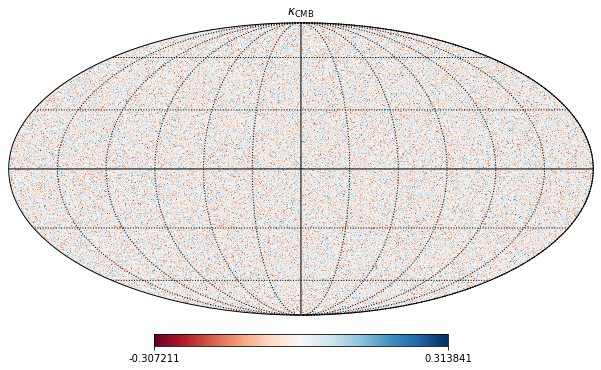

In [13]:
#CMB kappa map
hp.mollview(maps_1[0, :], title=r'$\kappa_{\rm CMB}$', cmap = plt.cm.RdBu)
hp.graticule()

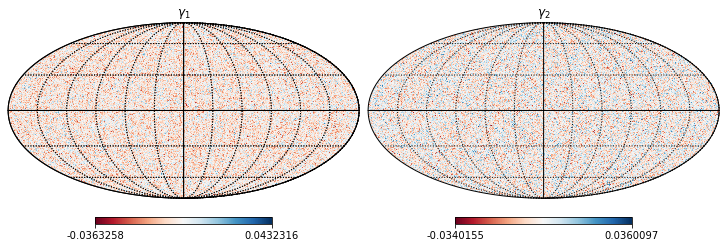

In [14]:
#cosmic shear signal map
plt.figure(figsize = (10, 5))
hp.mollview(maps_1[1, :], title=r'$\gamma_{1}$', sub = (121), cmap = plt.cm.RdBu )
hp.graticule()
hp.mollview(maps_1[2, :], title=r'$\gamma_{2}$', sub = (122), cmap = plt.cm.RdBu )
hp.graticule()

In [15]:
Cls = hp.anafast(maps_1, lmax=elmax, alm=False, pol = True)
#output order = TT, EE, BB, TE, EB, TB

# compare map $C_{\ell}$ with input theory $C_{\ell}$

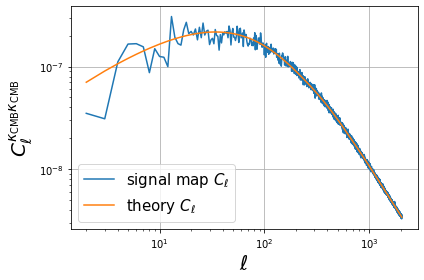

In [16]:
plt.plot(el[2:], Cls[0, 2:], label = r'signal map $C_{\ell}$')
plt.plot(el[2:], ClTT[2:], label = r'theory $C_{\ell}$')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylabel(r'$C^{\kappa_{\rm CMB} \kappa_{\rm CMB}}_{\ell}$', fontsize = 20)
plt.legend(loc = 'lower left', fontsize = 15)
plt.tight_layout()

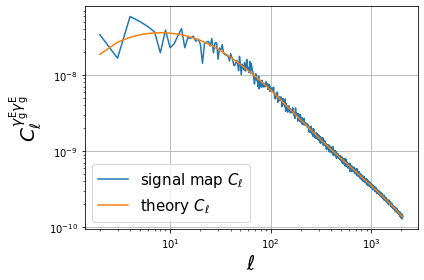

In [17]:
plt.plot(el[2:], Cls[1, 2:], label = r'signal map $C_{\ell}$')
plt.plot(el[2:], ClEE[2:], label = r'theory $C_{\ell}$')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylabel(r'$C^{ \gamma^{\rm E}_{\rm g} \gamma^{\rm E}_{\rm g}}_{\ell}$', fontsize = 20)
plt.legend(loc = 'lower left', fontsize = 15)
plt.tight_layout()

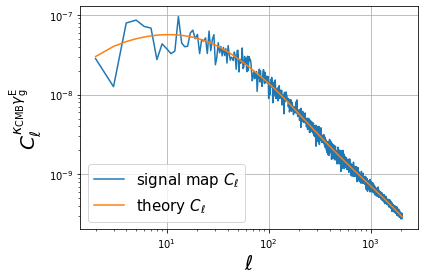

In [18]:
plt.plot(el[2:], Cls[3, 2:], label = r'signal map $C_{\ell}$')
plt.plot(el[2:], ClTE[2:], label = r'theory $C_{\ell}$')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylabel(r'$C^{\kappa_{\rm CMB} \gamma^{\rm E}_{\rm g}}_{\ell}$', fontsize = 20)
plt.legend(loc = 'lower left', fontsize = 15)
plt.tight_layout()

# Read mask maps for CMB convergence $\kappa_{\rm CMB}$ and shear $({\gamma_1, \gamma_2})$

In [19]:
kappa_mask = hp.read_map(data_path + 'binary_lensing_analysis_mask_nside1024.fits')

In [20]:
shear_mask = hp.read_map(data_path + 'shear_mask_nside1024.fits')

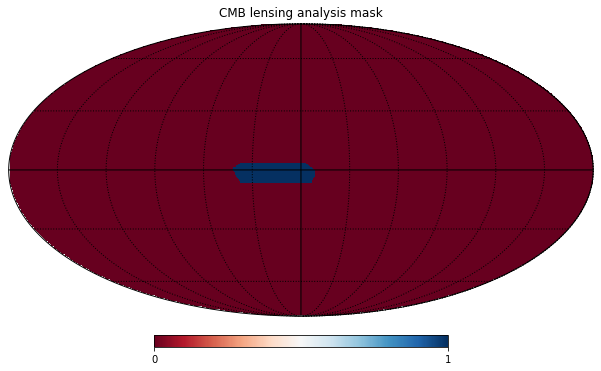

In [21]:
hp.mollview(kappa_mask, title = 'CMB lensing analysis mask', cmap = plt.cm.RdBu)
hp.graticule()

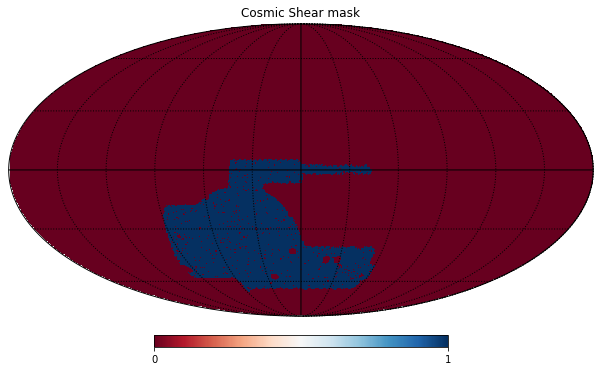

In [22]:
hp.mollview(shear_mask, title = 'Cosmic Shear mask', cmap = plt.cm.RdBu)
hp.graticule()

# Read noise maps for CMB convergence $\kappa_{\rm CMB}$ and shear $({\gamma_1, \gamma_2})$

In [23]:
kappa_noise = hp.ud_grade(np.load(data_path + 'noise_maps/kappa_noise_map_nside2048_0.npy'), nside_out=nside)

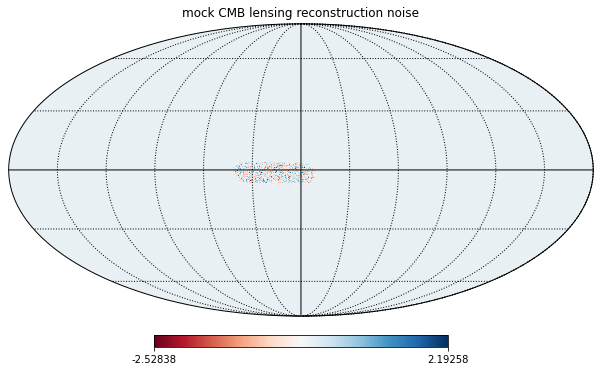

In [24]:
hp.mollview(kappa_noise, title = 'mock CMB lensing reconstruction noise', cmap = plt.cm.RdBu)
hp.graticule()

In [25]:
g1_noise = hp.ud_grade(np.load(data_path + 'noise_maps/gamma1_noise_map_nside2048_bin4_0.npy'), nside_out=nside)
g2_noise = hp.ud_grade(np.load(data_path + 'noise_maps/gamma2_noise_map_nside2048_bin4_0.npy'), nside_out=nside)

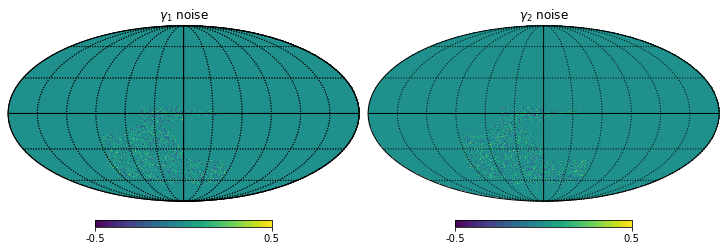

In [26]:
#cosmic shear signal map
plt.figure(figsize = (10, 5))
hp.mollview(g1_noise, sub = (121), min = -0.5, max = 0.5, 
            title = r'$\gamma_1$ noise')#, cmap = plt.cm.RdBu)
hp.graticule()
hp.mollview(g2_noise, sub = (122), min = -0.5, max = 0.5,
           title = r'$\gamma_2$ noise')#, cmap = plt.cm.RdBu)
hp.graticule()

# mock data = signal + noise (over unmasked sky)

In [27]:
kappa_data = maps_1[0, :]*kappa_mask**2 + kappa_noise

In [28]:
g1_data = maps_1[1, :]*shear_mask + g1_noise
g2_data = maps_1[2, :]*shear_mask + g2_noise

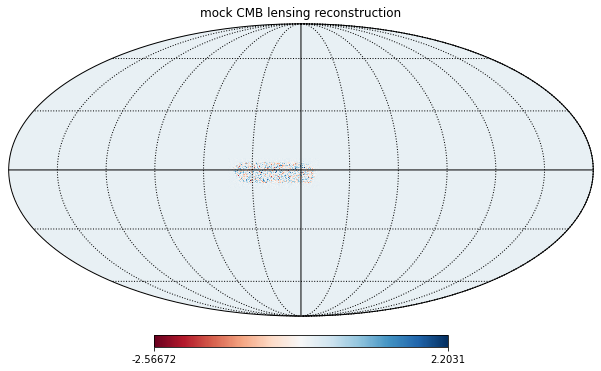

In [29]:
hp.mollview(kappa_data, title = 'mock CMB lensing reconstruction', cmap = plt.cm.RdBu)
hp.graticule()

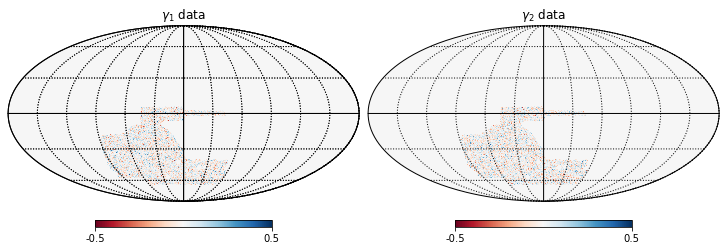

In [30]:
#cosmic shear signal map
plt.figure(figsize = (10, 5))
hp.mollview(g1_data, title=r'$\gamma_{1}$ data', sub = (121), min = -0.5, max = 0.5, cmap = plt.cm.RdBu)
hp.graticule()
hp.mollview(g2_data, title=r'$\gamma_{2}$ data', sub = (122), min = -0.5, max = 0.5, cmap = plt.cm.RdBu)
hp.graticule()

In [31]:
#shape noise
sigma_e = 0.309
#effective number density (per arcmin square)
neff = 1.461

In [32]:
rad2toarcmin2 = ((180/np.pi)*60)**2
#approximate shear noise power spectrum estimate (neff in per steradian)
Nl_gg = sigma_e/(neff*rad2toarcmin2)
Nl_gg

1.7896186537777198e-08

# Namaster computations

# determine the binning

In [33]:
delta_l = 200
nbins = math.ceil((elmax-100)/delta_l) + 1
edgs = []
edgs.append(0)
for i in np.arange(0, nbins-1, 1):
    if i == 0:
        edgs.append(100)
    else:
        edgs.append(edgs[i]+delta_l)
edgs.append(elmax)
ledges = np.asarray(edgs)
print('ledges', ledges)

ells = np.arange(0, elmax+1, 1)
bpws = np.ones_like(ells, dtype = 'int')
weights = np.zeros_like(ells, dtype = 'float64')

for i in np.arange(0, nbins, 1):
    bpws[ledges[i]:ledges[i+1]] = i
    weights[ledges[i]:ledges[i+1]] = 1.

b = nmt.NmtBin(nside=nside, bpws=bpws, ells=ells, weights=weights, lmax=elmax)

ledges [   0  100  300  500  700  900 1100 1300 1500 1700 1900 2048]


In [34]:
bpws

array([ 0,  0,  0, ..., 10, 10,  1])

In [35]:
eff_ells = b.get_effective_ells()

In [36]:
#depending on the kappa reconstruction map, one may have to square the mask & masked_on_input = True
f0 = nmt.NmtField(kappa_mask, [kappa_data], beam = None)

In [37]:
f2 = nmt.NmtField(shear_mask, [g1_data, g2_data], purify_b=False, beam = None)

In [38]:
#Workspace
w00 = nmt.NmtWorkspace()
w00.compute_coupling_matrix(f0, f0, b)

In [39]:
w02 = nmt.NmtWorkspace()
w02.compute_coupling_matrix(f0, f2, b)

In [40]:
w22 = nmt.NmtWorkspace()
w22.compute_coupling_matrix(f2, f2, b)

In [41]:
def compute_pcl(f_a, f_b, wsp):
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    cl_decoupled = wsp.decouple_cell(cl_coupled)
    return cl_decoupled

In [42]:
cl_00 = compute_pcl(f0, f0, w00)

In [43]:
cl_02 = compute_pcl(f0, f2, w02)

In [44]:
cl_22 = compute_pcl(f2, f2, w22)

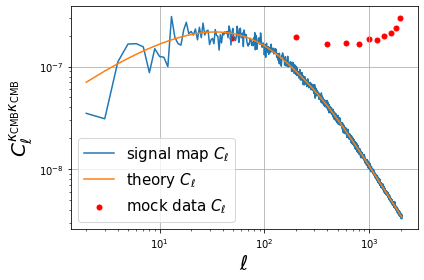

In [45]:
plt.plot(el[2:], Cls[0, 2:], label = r'signal map $C_{\ell}$')
plt.plot(el[2:], ClTT[2:], label = r'theory $C_{\ell}$')
plt.scatter(eff_ells, cl_00, label = r'mock data $C_{\ell}$', marker = '.', s = 100, color = 'r')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylabel(r'$C^{\kappa_{\rm CMB} \kappa_{\rm CMB}}_{\ell}$', fontsize = 20)
plt.legend(loc = 'lower left', fontsize = 15)
plt.tight_layout()

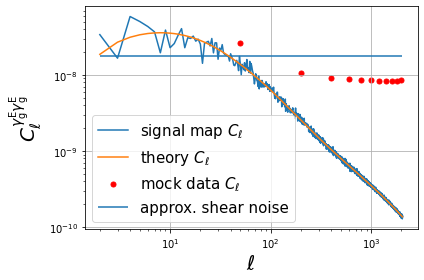

In [46]:
plt.plot(el[2:], Cls[1, 2:], label = r'signal map $C_{\ell}$')
plt.plot(el[2:], ClEE[2:], label = r'theory $C_{\ell}$')
plt.scatter(eff_ells, cl_22[0, :], label = r'mock data $C_{\ell}$', marker = '.', s = 100, color = 'r')
plt.hlines(Nl_gg, 2, elmax, label = 'approx. shear noise')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylabel(r'$C^{ \gamma^{\rm E}_{\rm g} \gamma^{\rm E}_{\rm g}}_{\ell}$', fontsize = 20)
plt.legend(loc = 'lower left', fontsize = 15)
plt.tight_layout()

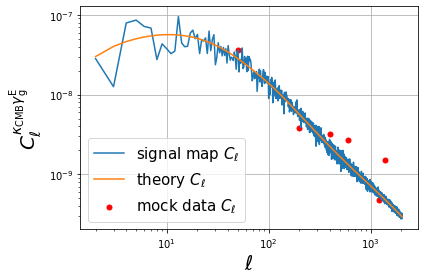

In [47]:
plt.plot(el[2:], Cls[3, 2:], label = r'signal map $C_{\ell}$')
plt.plot(el[2:], ClTE[2:], label = r'theory $C_{\ell}$')
plt.scatter(eff_ells, cl_02[0, :], label = r'mock data $C_{\ell}$', marker = '.', s = 100, color = 'r')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylabel(r'$C^{\kappa_{\rm CMB} \gamma^{\rm E}_{\rm g}}_{\ell}$', fontsize = 20)
plt.legend(loc = 'lower left', fontsize = 15)
plt.tight_layout()

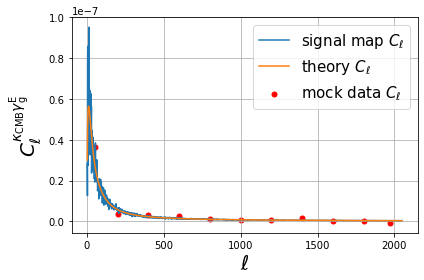

In [48]:
#same as above but withou log scale
plt.plot(el[2:], Cls[3, 2:], label = r'signal map $C_{\ell}$')
plt.plot(el[2:], ClTE[2:], label = r'theory $C_{\ell}$')
plt.scatter(eff_ells, cl_02[0, :], label = r'mock data $C_{\ell}$', marker = '.', s = 100, color = 'r')
plt.grid()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylabel(r'$C^{\kappa_{\rm CMB} \gamma^{\rm E}_{\rm g}}_{\ell}$', fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 15)
plt.tight_layout()

# Bandpower window to be used when comparing Namaster bandpowers with binned theory Cls

In [49]:
bw00 = w00.get_bandpower_windows()
bw02 = w02.get_bandpower_windows()
bw22 = w22.get_bandpower_windows()

In [50]:
bw00.shape, bw02.shape, bw22.shape

((1, 11, 1, 2049), (2, 11, 2, 2049), (4, 11, 4, 2049))

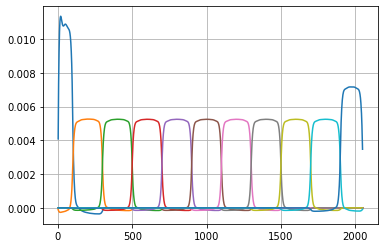

In [51]:
for i in range(nbins):
    plt.plot(el[2:], bw00[0, i, 0, 2:])
    #plt.scatter(el[2:], bw02[0, i, 0, 2:])
plt.grid()

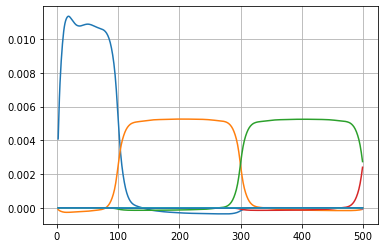

In [52]:
for i in range(nbins):
    plt.plot(el[2:500], bw00[0, i, 0, 2:500])
plt.grid()

In [53]:
#Cls binned with tophat binning
binned_ClTE = b.bin_cell(cls_in=ClTE)

In [54]:
#Cls binned with accurate bandpower windows shown in above plot
acc_binned_ClTE = np.dot(bw02[0, :, 0, :], ClTE)

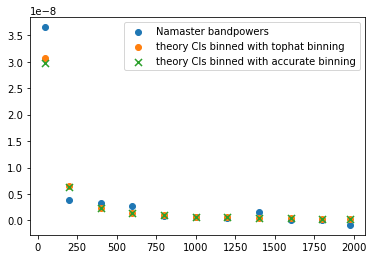

In [55]:
plt.scatter(eff_ells, cl_02[0, :], label = 'Namaster bandpowers')
plt.scatter(eff_ells, binned_ClTE, label = 'theory Cls binned with tophat binning')
plt.scatter(eff_ells, acc_binned_ClTE, marker = 'x', s = 50, label = 'theory Cls binned with accurate binning')
plt.legend(loc = 'upper right', fontsize = 10)